In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#loading the dataset
df = pd.read_csv("Adidas US Sales Datasets.csv")
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


# Understanding the Data

In [49]:
#describing the dataframe
df.shape

(9648, 13)

In [50]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 7.3 MB


In [51]:
#checking for null and missing values
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [52]:
#checking the clumn data types
df.dtypes

Retailer            object
Retailer ID          int64
Invoice Date        object
Region              object
State               object
City                object
Product             object
Price per Unit      object
Units Sold          object
Total Sales         object
Operating Profit    object
Operating Margin    object
Sales Method        object
dtype: object

In [53]:
#identifying the retailers
df['Retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

<Axes: ylabel='Retailer'>

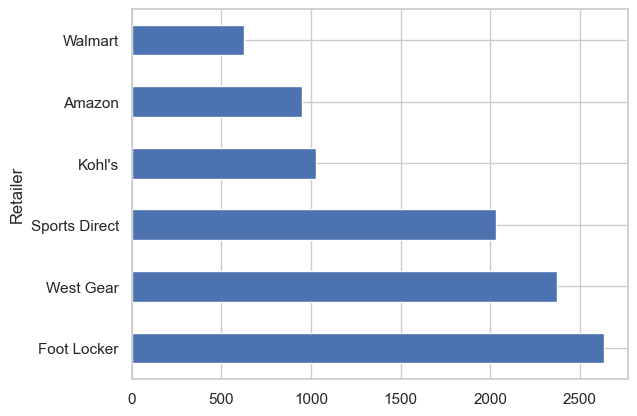

In [54]:
df['Retailer'].value_counts().plot(kind='barh')

In [55]:
#analyzing the regions featured in the dataset
df['Region'].unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

In [56]:
#identifying the number of states present in the dataset
df['State'].nunique() 

50

In [57]:
#identifying the number of cities present in the dataset
df['City'].nunique()

52

In [58]:
#identifying the products present in the dataset
df['Product'].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

In [59]:
df['Product'].value_counts()

Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64

In [60]:
#identifying the types of sales methods present in the dataset
df['Sales Method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

<Axes: ylabel='Sales Method'>

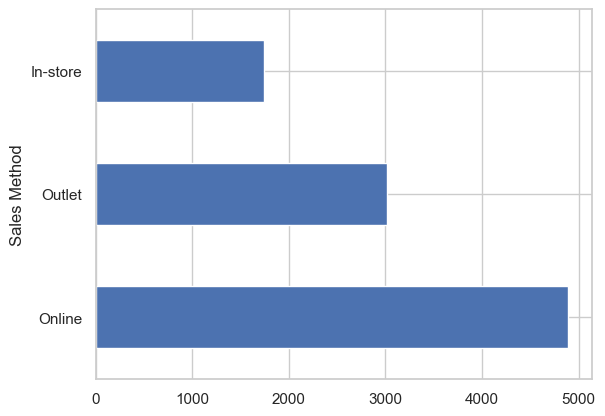

In [61]:
df['Sales Method'].value_counts().plot(kind='barh')

In [62]:
#converting the invoice date column to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])


In [63]:
#identifying the number of retailers by retailer id
df['Retailer ID'].nunique()

4

In [64]:
retailer_id = df.groupby('Retailer ID')['Retailer'].value_counts()
print(retailer_id)

Retailer ID  Retailer     
1128299      West Gear        1164
             Foot Locker       515
             Sports Direct     281
             Kohl's            216
             Walmart           194
1185732      Foot Locker      2018
             Sports Direct     962
             Amazon            949
             West Gear         916
             Kohl's            288
             Walmart           132
1189833      Kohl's            360
1197831      Sports Direct     789
             Walmart           300
             West Gear         294
             Kohl's            166
             Foot Locker       104
Name: count, dtype: int64


In [65]:
#grouping the data by Sales method to show sales count for each retailer
retail_method = df.groupby('Sales Method')['Retailer'].value_counts()
print(retail_method)

Sales Method  Retailer     
In-store      West Gear         699
              Foot Locker       449
              Sports Direct     293
              Kohl's            144
              Amazon            118
              Walmart            37
Online        Foot Locker      1395
              West Gear        1095
              Sports Direct     995
              Kohl's            576
              Amazon            540
              Walmart           288
Outlet        Foot Locker       793
              Sports Direct     744
              West Gear         580
              Kohl's            310
              Walmart           301
              Amazon            291
Name: count, dtype: int64


# **EDA**


In [66]:
#converting the Units sold column to integer dtype
df['Units Sold'] = df['Units Sold'].str.replace(',', '').astype(int)

In [67]:
#ectracting only the month and year from the invoie date column
df['Invoice Month'] = df['Invoice Date'].dt.strftime('%m')

In [68]:
df['Invoice Year'] = df['Invoice Date'].dt.year

In [69]:
df['Invoice Month'] = pd.to_datetime('2023-' + df['Invoice Month'] + '-01', format='%Y-%m-%d').dt.strftime('%B')


In [70]:
# Define the custom order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the "Month Name" column to a Categorical data type with the custom order
df['Invoice Month'] = pd.Categorical(df['Invoice Month'], categories=month_order, ordered=True)

In [71]:
# Remove commas, spaces, and dollar signs, and convert to integers or floats
df['Price per Unit'] = df['Price per Unit'].str.replace("[\$,]", "", regex=True).astype(float)
df['Operating Profit'] = df['Operating Profit'].str.replace("[\$, ]", "", regex=True).astype(int)
df['Total Sales'] = df['Total Sales'].str.replace("[\$,]", "", regex=True).astype(int)

df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Invoice Month,Invoice Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,50%,In-store,January,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000,150000,30%,In-store,January,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000,140000,35%,In-store,January,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500,133875,35%,In-store,January,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000,162000,30%,In-store,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200,896,28%,Outlet,January,2021
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305,1378,32%,Outlet,January,2021
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544,2791,37%,Outlet,February,2021
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940,1235,42%,Outlet,February,2021


In [72]:
#exctrating the day of week from invoice date
df['Invoice Day'] = df['Invoice Date'].dt.day_name()
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Invoice Month,Invoice Year,Invoice Day
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,50%,In-store,January,2020,Wednesday
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000,150000,30%,In-store,January,2020,Thursday
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000,140000,35%,In-store,January,2020,Friday
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500,133875,35%,In-store,January,2020,Saturday
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000,162000,30%,In-store,January,2020,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200,896,28%,Outlet,January,2021,Sunday
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305,1378,32%,Outlet,January,2021,Sunday
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544,2791,37%,Outlet,February,2021,Monday
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940,1235,42%,Outlet,February,2021,Monday


In [73]:
#import folium
#import json

#grouping by state to calculate total units sold per state
#state_units = df.groupby('City')['Units Sold'].sum().reset_index()

#loading the geojson file
#with open('us-states.json') as f:
 #   geojson = json.load(f)


#creating a folium map centered on the united states
#m = folium.Map(location=[37.0902,-95.7129], zoom_start=4)

#color gradient
#colormap = folium.LinearColormap(colors=['red', 'orange', 'yellow', 'green', 'blue', 'purple'], vmin=0, vmax=1000)
#colormap.caption = 'Units Sold'

#
#state_units['Units Sold'] = pd.to_numeric(state_units['Units Sold'])

#adding  a layer
#folium.Choropleth(
 #   geo_data=geojson,
  #  name='choropleth',
   # data=state_units,
    #columns=['City', 'Units Sold'],
    #key_on='feature.properties.NAME',
    #fill_color='YlGn',
   # fill_opacity=0.7,
    #line_opacity=0.2,
    #color=colormap,
    #legend_name='Units Sold').add_to(m)
#display the map
#m

In [74]:
# Import necessary libraries
#import geopy
#from folium.plugins import HeatMap
#import folium

# Create a geocoder object
#geolocator = geopy.Nominatim(user_agent='my_app')

# Apply the geocode function to get the location
#df['Location'] = df['State'].apply(lambda x: geolocator.geocode(x))

# Extract latitude and longitude from the Location object
#df['Latitude'] = df['Location'].apply(lambda location: location.latitude if location else None)
#df['Longitude'] = df['Location'].apply(lambda location: location.longitude if location else None)

# Filter out rows with missing coordinates
#df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a heatmap
#heatmap = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)
#heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]
#HeatMap(heat_data).add_to(heatmap)

# Display the heatmap
#heatmap.save('heatmap.html')


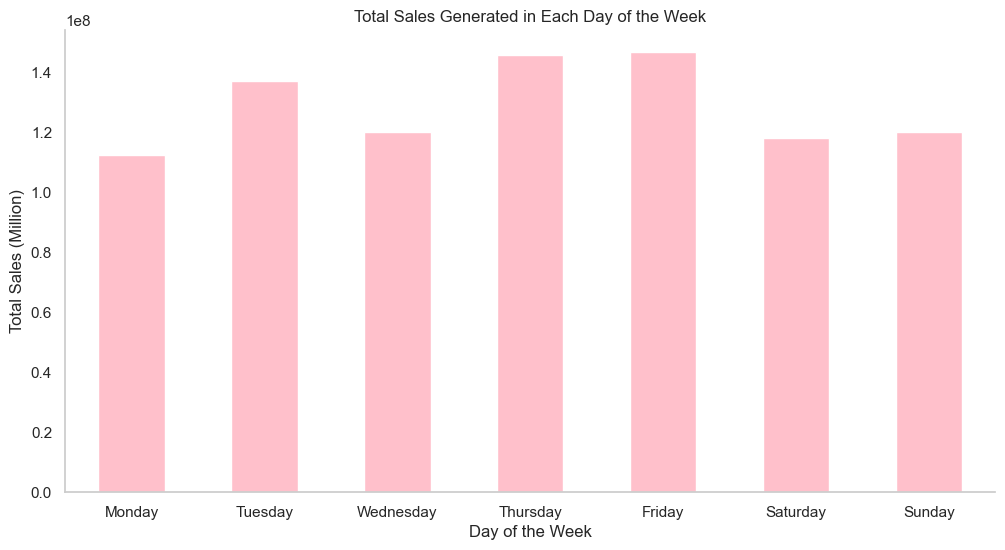

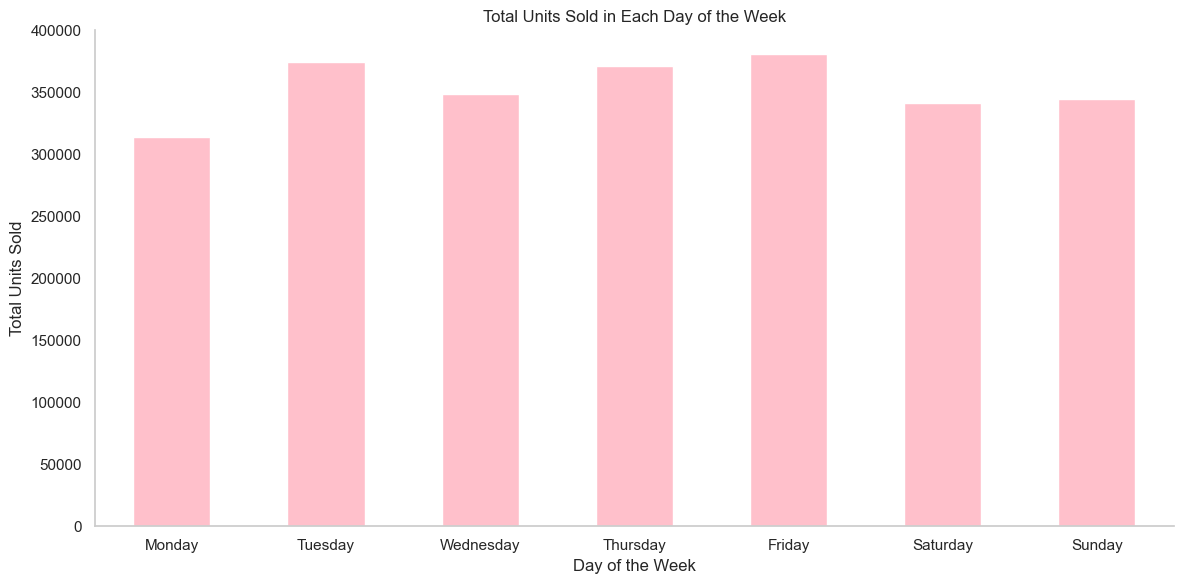

In [75]:
import seaborn as sns
#visualizing the total sales generated in each day of the week

#grouping the data by invoice day column
daily_sales = df.groupby('Invoice Day')['Total Sales'].sum()

#creating a custom order for the days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the Series based on the custom order
daily_sales['Invoice Day'] = daily_sales.index
daily_sales = daily_sales.reindex(days)

#plotting the data
plt.figure(figsize=(12,6))
ax = daily_sales.plot(kind='bar', color='pink')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(days, rotation=0)

plt.title('Total Sales Generated in Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (Million)')
ax.set_facecolor('white')
plt.grid(False)
plt.show()

#visualizing the units sold in each day of the week
daily_units_sold = df.groupby('Invoice Day')['Units Sold'].sum()

#reordering the series based on a custom day order
daily_units_sold['Invoice Day'] = daily_units_sold.index
daily_units_sold = daily_units_sold.reindex(days)

#plotting the data
plt.figure(figsize=(12,6))
x = daily_units_sold.plot(kind='bar', color='pink')
x.spines['top'].set_visible(False)
x.spines['right'].set_visible(False)
x.set_xticklabels(days, rotation=0)

plt.title('Total Units Sold in Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Units Sold')
x.set_facecolor('white')
plt.grid(False)
plt.tight_layout()
plt.show()


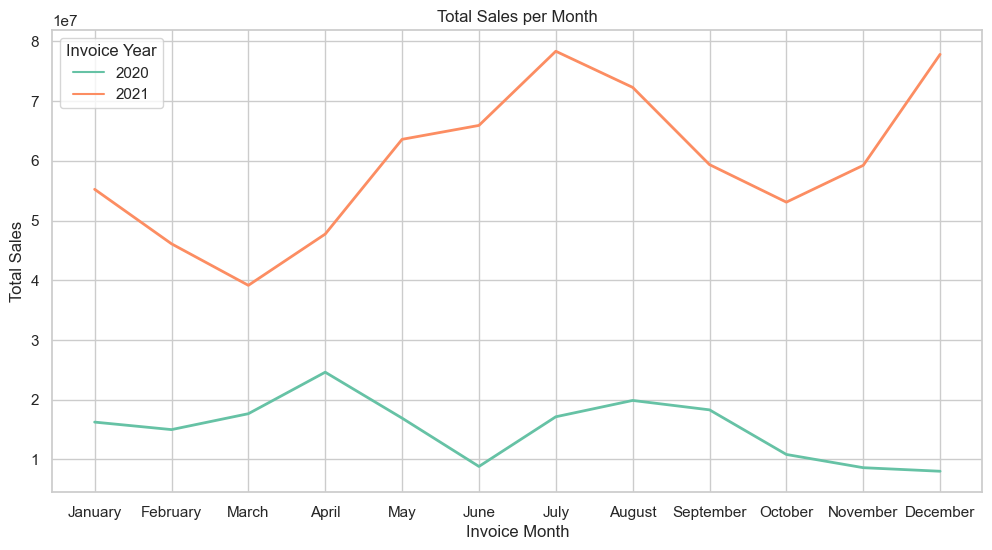

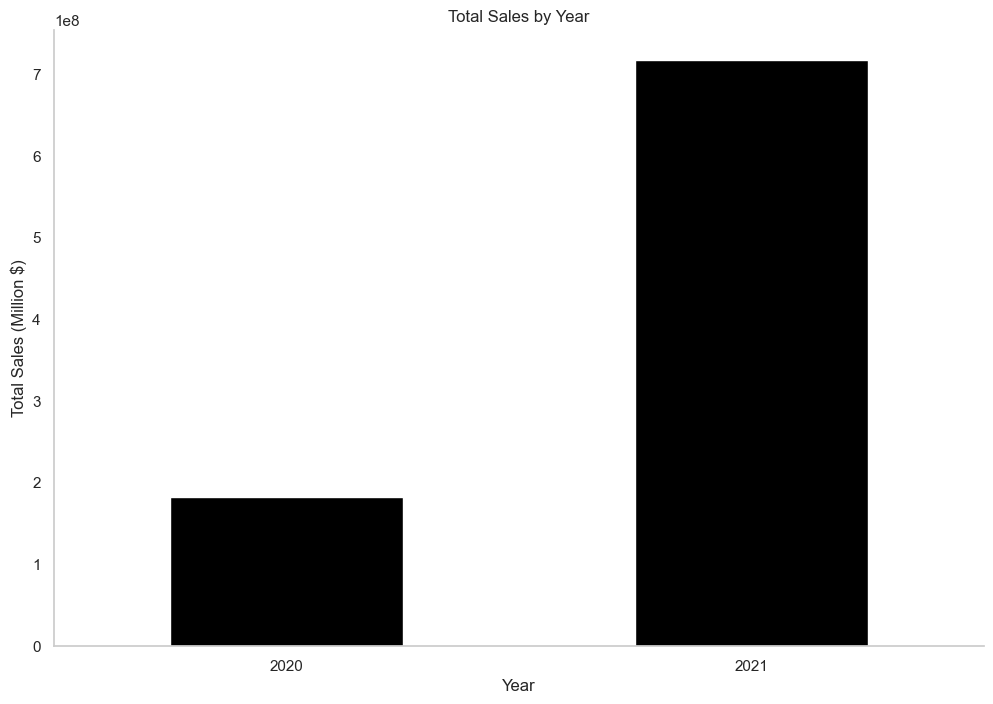

In [76]:
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

# Grouping the data by 'Invoice Year' and 'Invoice Month' columns
monthly_sales = df.groupby(['Invoice Year', 'Invoice Month'])['Total Sales'].sum()

# Reset the index to have a DataFrame
monthly_sales = monthly_sales.reset_index()

# Plotting the data using 'Invoice Year' as the hue
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Invoice Month', y='Total Sales', hue='Invoice Year',
             markers='o', dashes=True, palette='Set2', linewidth=2)
plt.title('Total Sales per Month')
plt.xlabel('Invoice Month')
plt.ylabel('Total Sales')
plt.legend(title='Invoice Year')
plt.show()

yearly_sales = df.groupby('Invoice Year')['Total Sales'].sum()
#plotting the data
plt.figure(figsize=(12, 8))
ax = yearly_sales.plot(kind='bar', color='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=0)
plt.title("Total Sales by Year")
plt.ylabel("Total Sales (Million $)")
plt.xlabel("Year")
plt.grid(False)
plt.show()



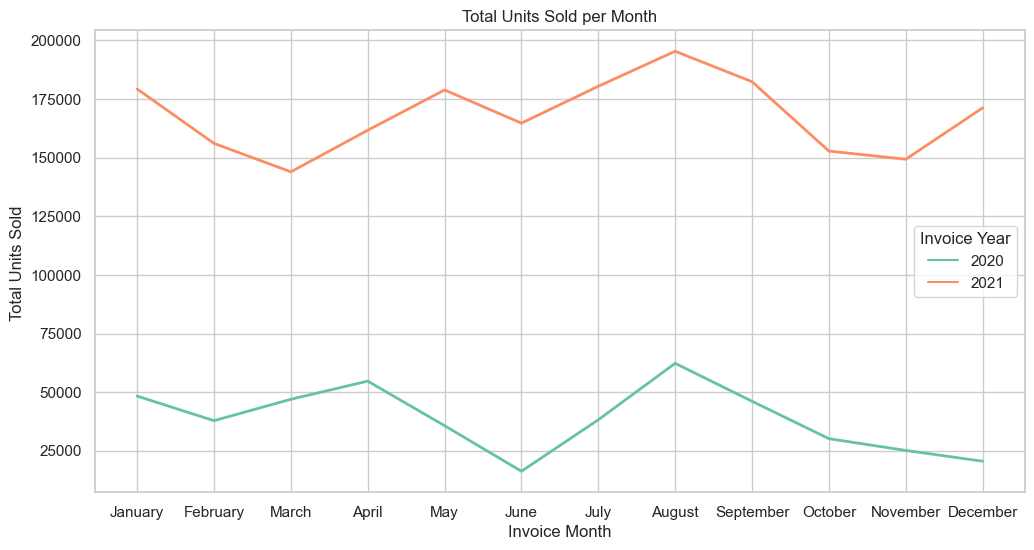

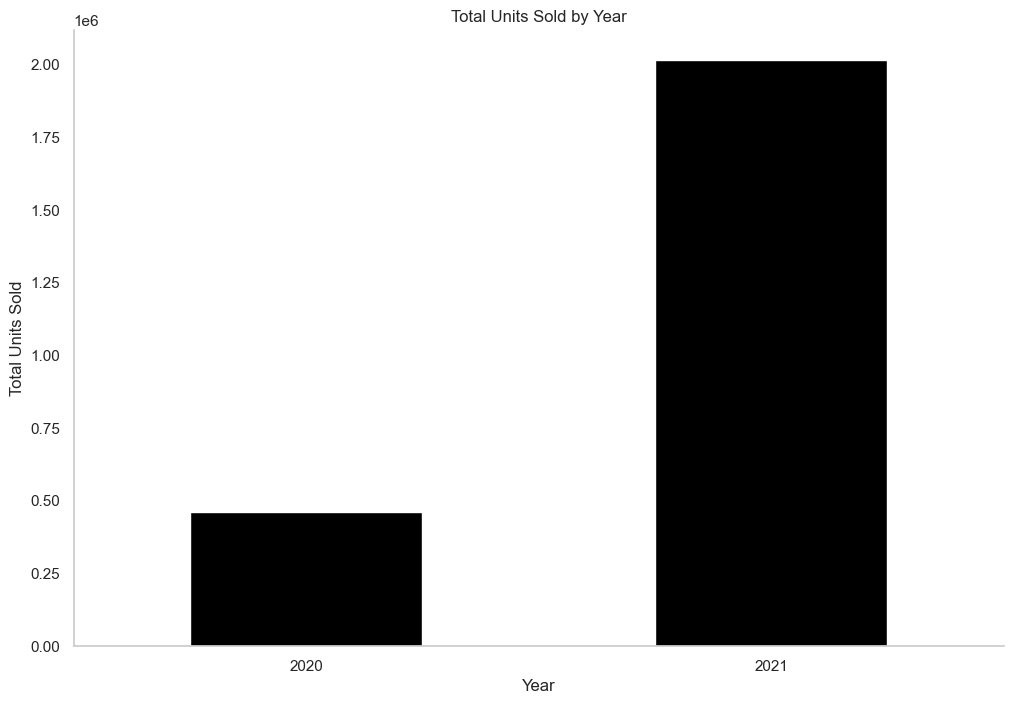

In [77]:
# Grouping the data by 'Invoice Year' and 'Invoice Month' columns
monthly_units = df.groupby(['Invoice Year', 'Invoice Month'])['Units Sold'].sum()

# Reset the index to have a DataFrame
monthly_units = monthly_units.reset_index()

# Plotting the data using 'Invoice Year' as the hue
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_units, x='Invoice Month', y='Units Sold', hue='Invoice Year',
             markers='o', dashes=True, palette='Set2', linewidth=2)
plt.title('Total Units Sold per Month')
plt.xlabel('Invoice Month')
plt.ylabel('Total Units Sold ')
plt.legend(title='Invoice Year')
plt.show()

yearly_units = df.groupby('Invoice Year')['Units Sold'].sum()
#plotting the data
plt.figure(figsize=(12, 8))
ax = yearly_units.plot(kind='bar', color='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=0)
plt.title("Total Units Sold by Year")
plt.ylabel("Total Units Sold")
plt.xlabel("Year")
plt.grid(False)
plt.show()


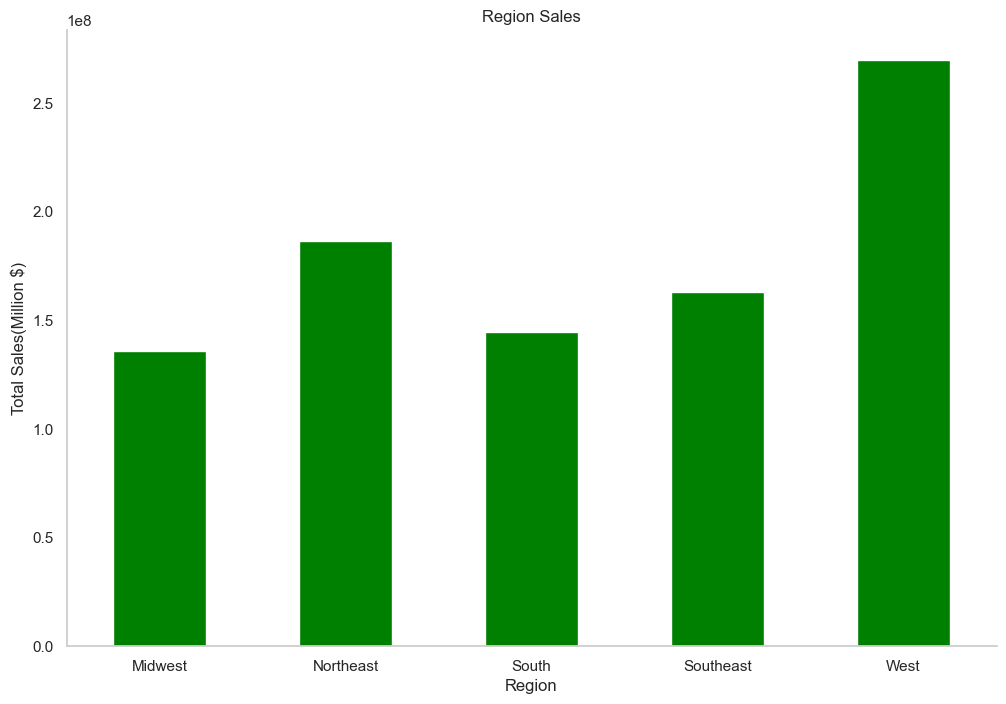

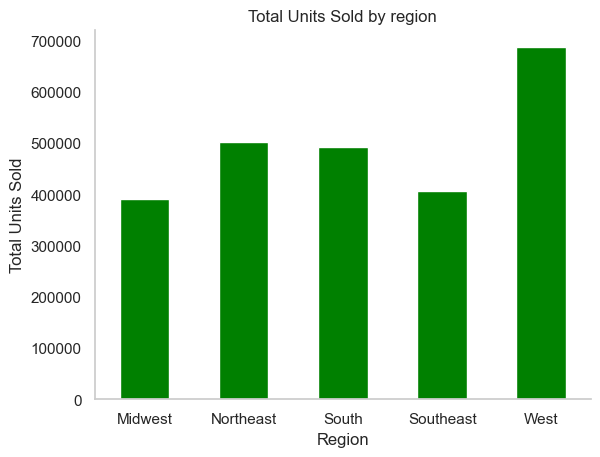

In [78]:
#visualizing the total sales per region
region_sales = df.groupby('Region')['Total Sales'].sum()

#plotting the data
plt.figure(figsize=(12, 8))
ax = region_sales.plot(kind='bar', color='green')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=0)

plt.title('Region Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales(Million $)')
ax.set_facecolor('white')
plt.grid(False)
plt.show()

#visualizing units sold by region
region_units = df.groupby('Region')['Units Sold'].sum()
ab = region_units.plot(kind='bar', color='green')
ab.spines['top'].set_visible(False)
ab.spines['right'].set_visible(False)
#ab.spines['left'].set_visible(False)
#ab.spines['bottom'].set_visible(False)
plt.xticks(rotation=0)

plt.title('Total Units Sold by region')
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
ab.set_facecolor('white')
plt.grid(False)
plt.show()

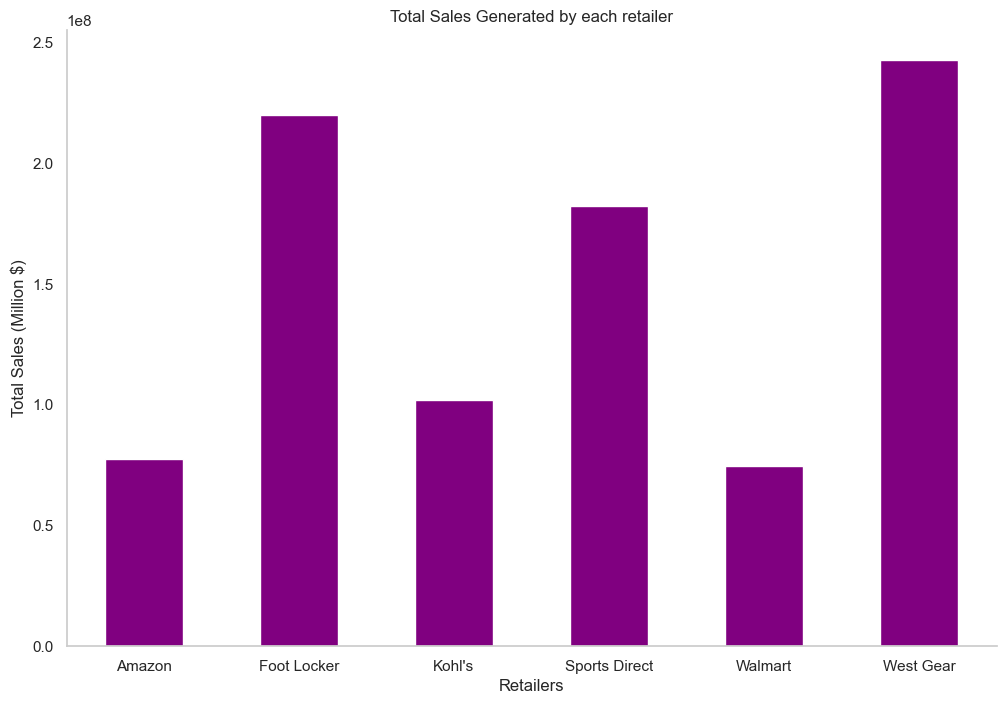

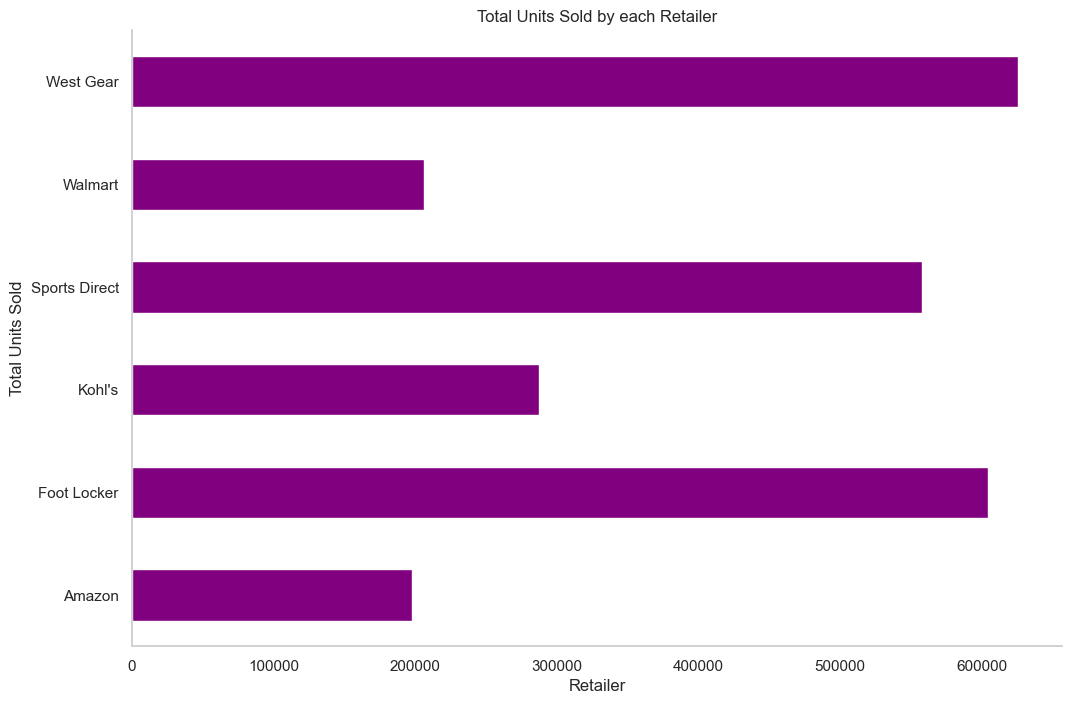

In [79]:
#visualizing each retailers total sales

#grouping the data by retailer column
retailer_sales = df.groupby('Retailer')['Total Sales'].sum()

#plotting the data
plt.figure(figsize=(12, 8))
r = retailer_sales.plot(kind='bar', color='purple')
r.spines['top'].set_visible(False)
r.spines['right'].set_visible(False)
r.set_facecolor('white')

plt.xlabel("Retailers")
plt.ylabel("Total Sales (Million $)")
plt.title("Total Sales Generated by each retailer")
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

#visualizing each retailers total units sold
retailer_units = df.groupby('Retailer')['Units Sold'].sum()

#plotting the data
plt.figure(figsize=(12, 8))
ru =  retailer_units.plot(kind='barh', color='purple')
ru.spines['top'].set_visible(False)
ru.spines['right'].set_visible(False)
ru.set_facecolor("white")

plt.xlabel("Retailer")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=0)
plt.title("Total Units Sold by each Retailer")
plt.grid(False)
plt.show()

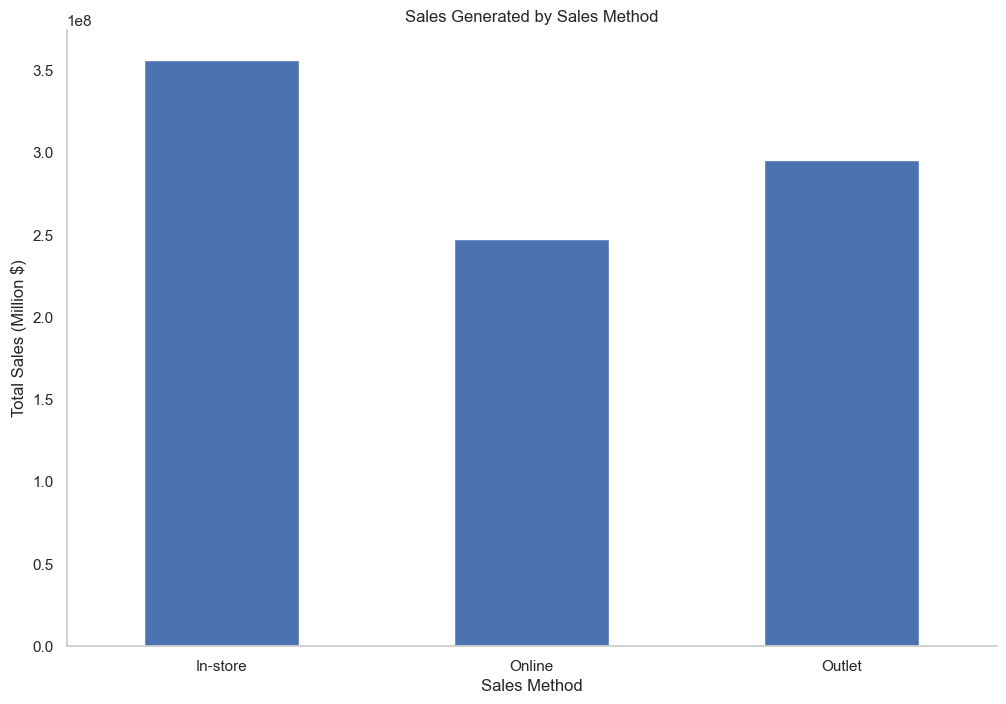

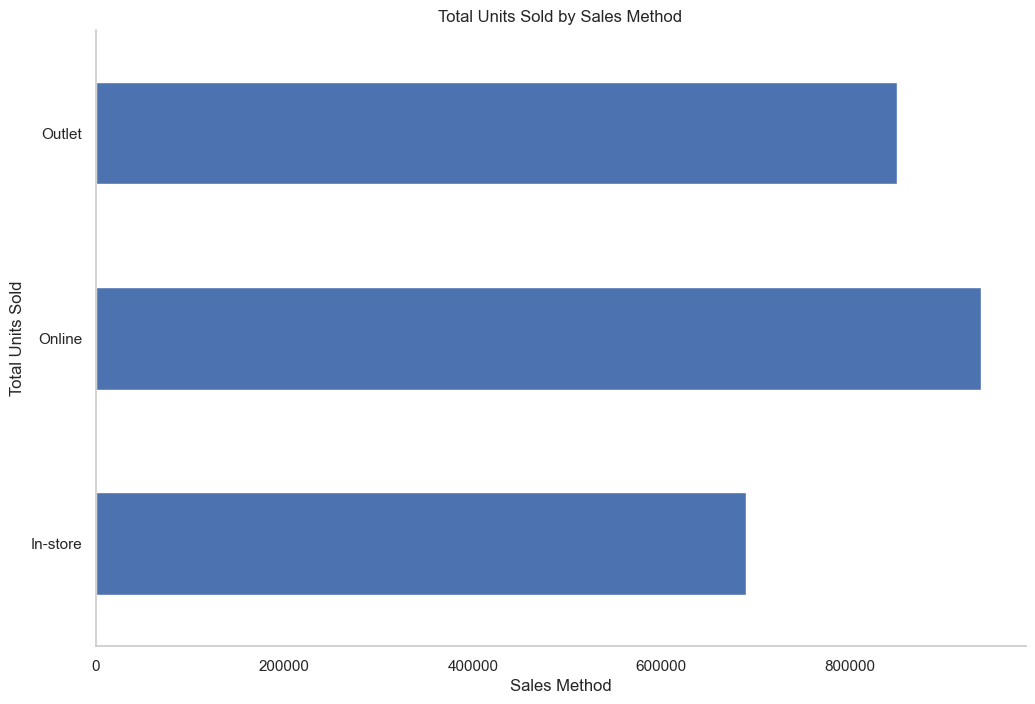

In [80]:
#visualizing the total sales generated by each sales method

#grouping the data by Sales Method column
sales_method = df.groupby('Sales Method')['Total Sales'].sum()

#plotting the data
plt.figure(figsize=(12, 8))
sm = sales_method.plot(kind='bar')
sm.spines['top'].set_visible(False)
sm.spines['right'].set_visible(False)

plt.xlabel("Sales Method")
plt.ylabel("Total Sales (Million $)")
plt.xticks(rotation=0)
plt.title("Sales Generated by Sales Method")
plt.grid(False)
plt.show()

#visualizing total units sold by each sales method

#grouping the data by Sales Method column
sales_units = df.groupby('Sales Method')['Units Sold'].sum()

#plotting the data
plt.figure(figsize=(12, 8))
su = sales_units.plot(kind='barh')
su.spines['top'].set_visible(False)
su.spines['right'].set_visible(False)

plt.xlabel("Sales Method")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=0)
plt.title("Total Units Sold by Sales Method")
plt.grid(False)
plt.show()

In [81]:
#analyzing the sales method column to understand why the 
#online sales method sold more units but still generated fewer sales than the other sales methods

#exploring the price per unit
price_per_unit = df.groupby('Sales Method')['Price per Unit'].mean()
price_per_unit.T



Sales Method
In-store    48.816092
Online      45.903252
Outlet      42.030142
Name: Price per Unit, dtype: float64

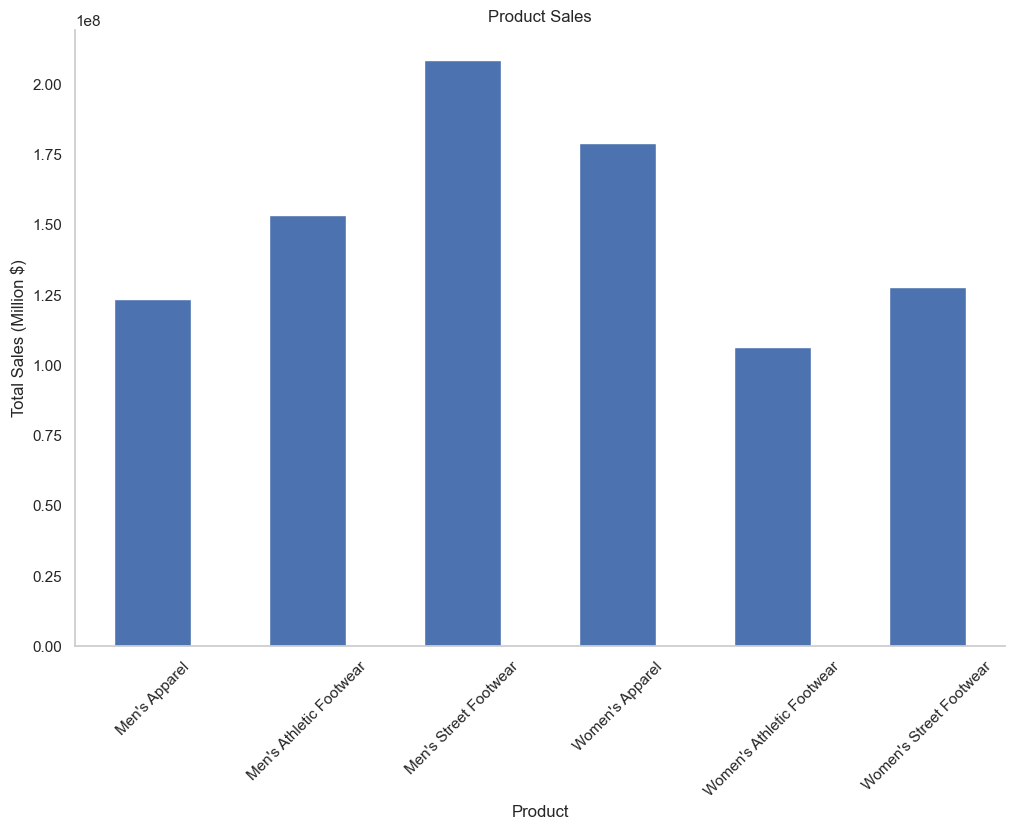

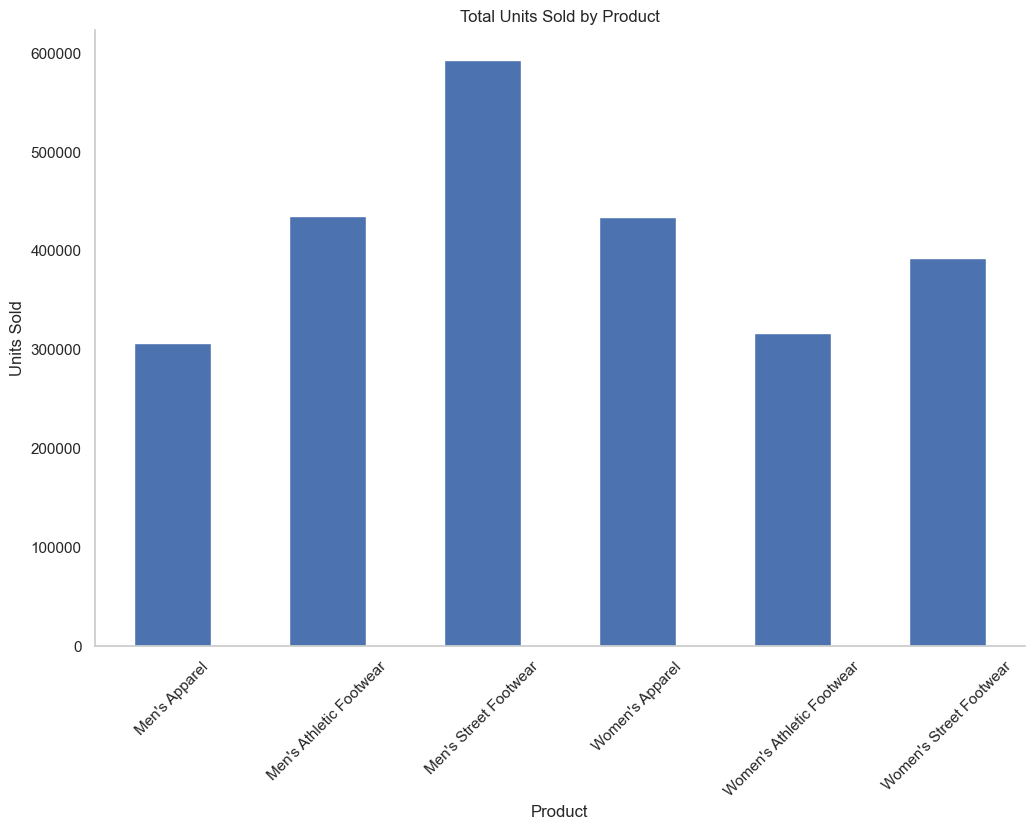

In [82]:
#visualizing product sales
product_sales = df.groupby('Product')['Total Sales'].sum()

#plotting the data
plt.figure(figsize=(12, 8))
ps = product_sales.plot(kind='bar')
ps.spines['top'].set_visible(False)
ps.spines['right'].set_visible(False)

plt.xlabel("Product")
plt.ylabel("Total Sales (Million $)")
plt.xticks(rotation=45)
plt.title("Product Sales")
plt.grid(False)
plt.show()

#visualizing product unit sales
product_units = df.groupby('Product')['Units Sold'].sum()

#plotting the data
plt.figure(figsize=(12, 8))
pu = product_units.plot(kind='bar')
pu.spines['top'].set_visible(False)
pu.spines['right'].set_visible(False)

plt.xlabel("Product")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.title("Total Units Sold by Product")
plt.grid(False)
plt.show()

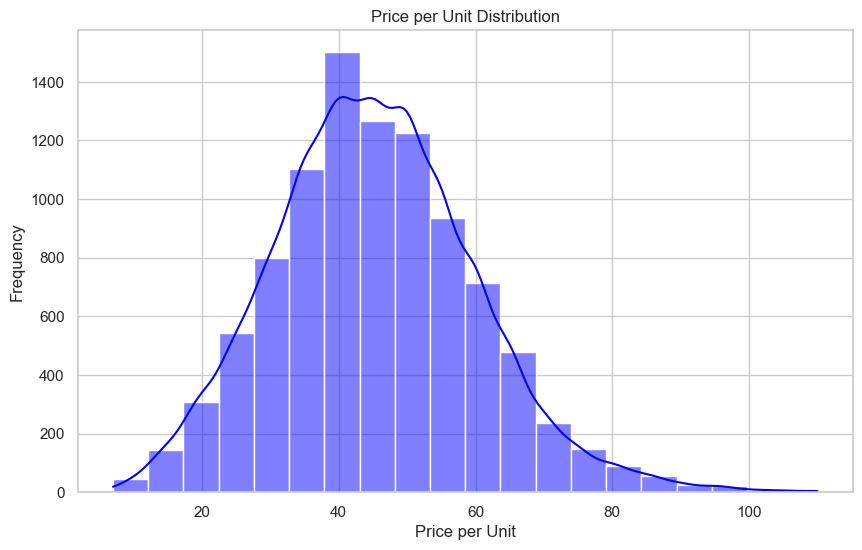

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.set(style="whitegrid")  # Set the style of the plot

# Create a distplot for "Price per Unit"
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Price per Unit", kde=True, bins=20, color='blue')

# Customize the plot
plt.title("Price per Unit Distribution")
plt.xlabel("Price per Unit")
plt.ylabel("Frequency")

# Show the plot
plt.show()


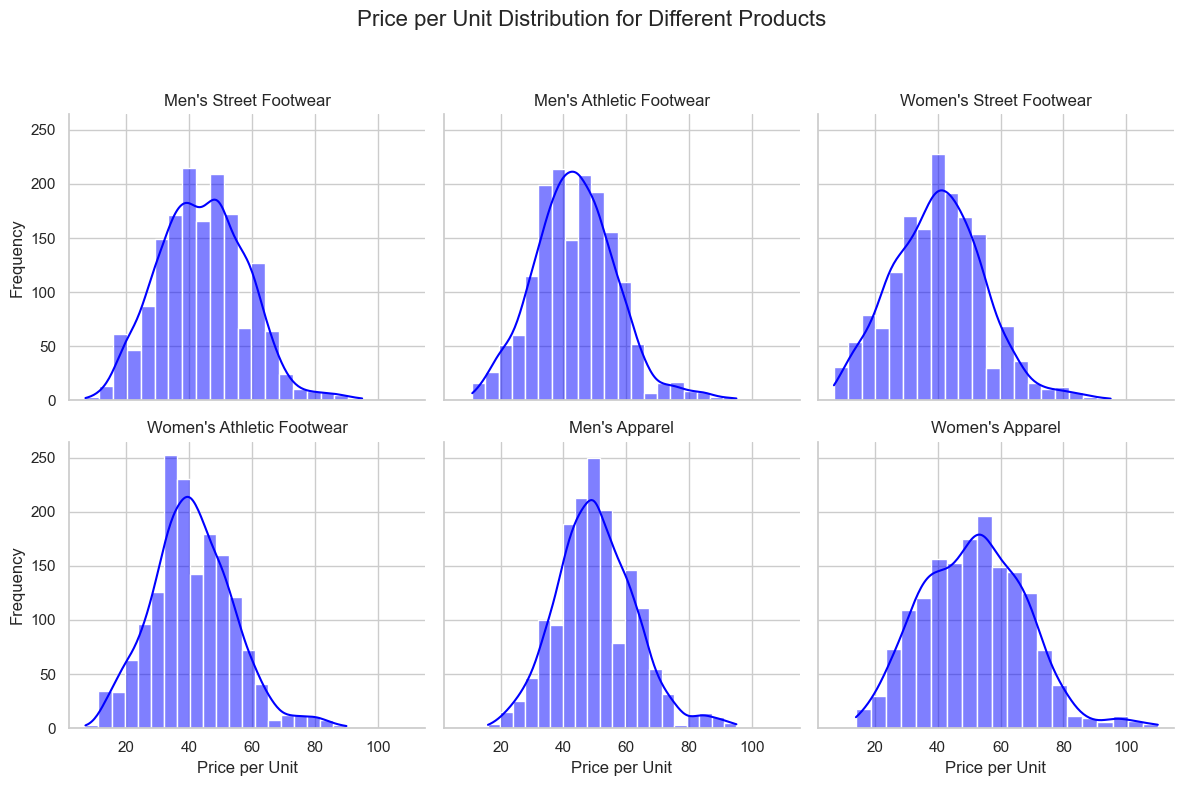

In [84]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a facet grid for each product
g = sns.FacetGrid(df, col="Product", col_wrap=3, height=4)
g.map(sns.histplot, "Price per Unit", kde=True, bins=20, color='blue')

# Customize the plots
g.set_axis_labels("Price per Unit", "Frequency")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Price per Unit Distribution for Different Products", fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()


In [85]:
df.groupby('Product')['Price per Unit'].describe().T

Product,Men's Apparel,Men's Athletic Footwear,Men's Street Footwear,Women's Apparel,Women's Athletic Footwear,Women's Street Footwear
count,1606.000000,1610.000000,1610.000000,1608.000000,1606.000000,1608.000000
mean,50.321918,43.779503,44.236646,51.600746,41.112702,40.252488
std,12.665713,13.083057,13.904738,16.539325,13.169884,14.657838
min,16.000000,11.000000,7.000000,14.000000,7.000000,7.000000
25%,42.000000,35.000000,35.000000,40.000000,33.000000,30.000000
50%,50.000000,44.000000,45.000000,51.000000,40.000000,40.000000
75%,59.000000,51.000000,55.000000,64.000000,50.000000,50.000000
max,95.000000,95.000000,95.000000,110.000000,90.000000,95.000000


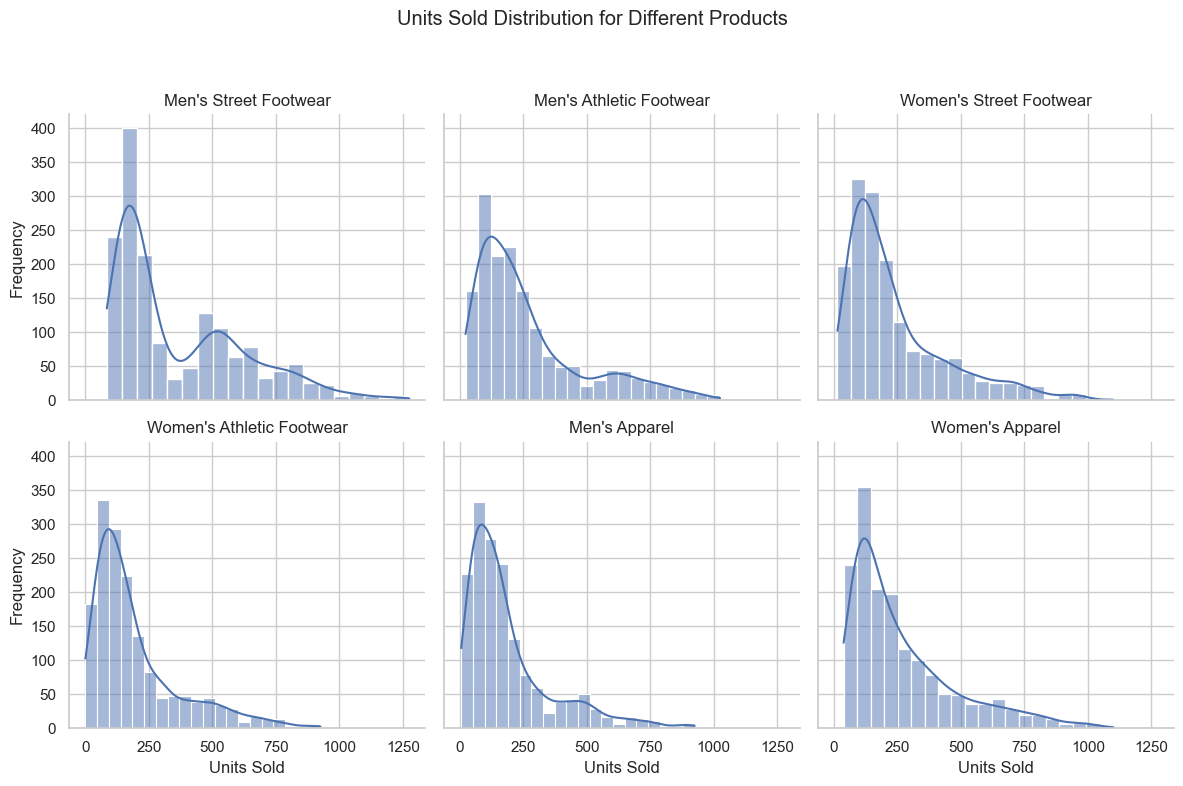

In [86]:
#visualizing units sold distribution among the products

#creating a facet grid for each product
g = sns.FacetGrid(df, col="Product", col_wrap=3, height=4)
g.map(sns.histplot, "Units Sold", kde=True, bins=20)

#customizing the plot
g.set_axis_labels("Units Sold", "Frequency")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Units Sold Distribution for Different Products")

plt.subplots_adjust(top=0.85)
plt.show()

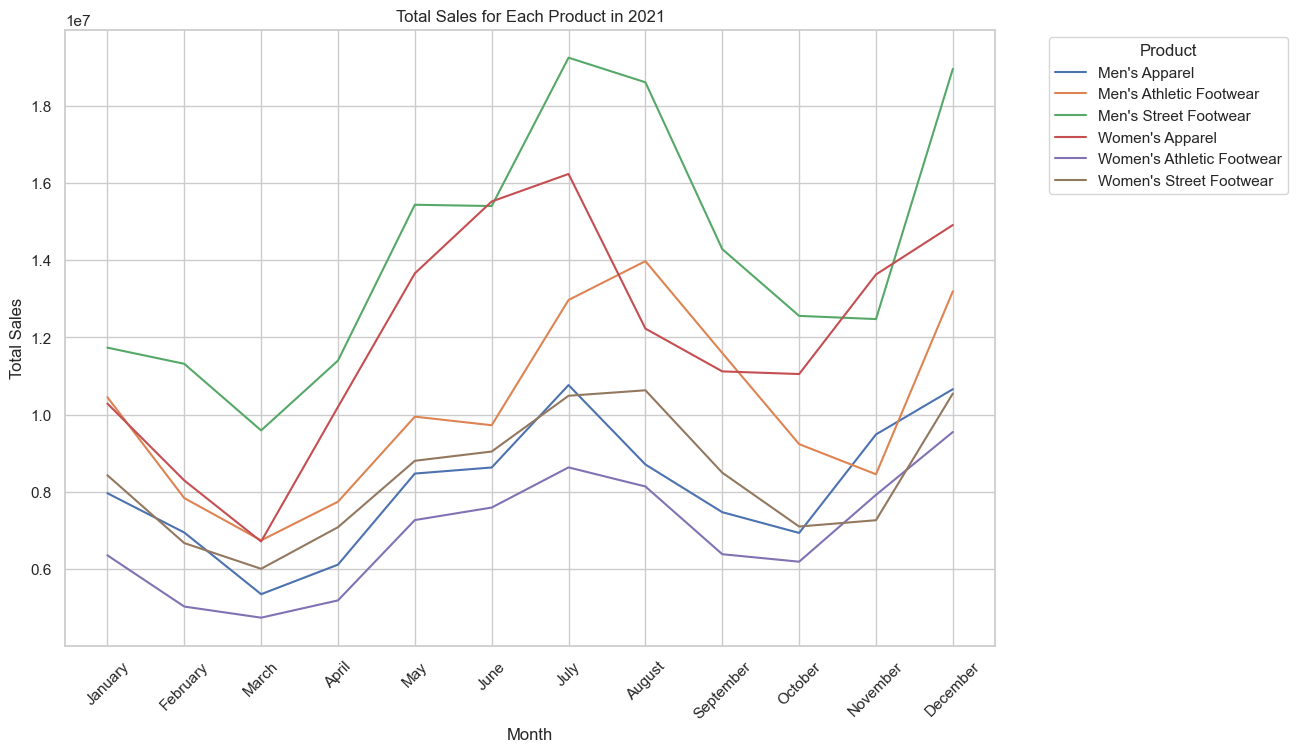

In [87]:
#visualizing monthly product sales for the year 2021

#filtering the data for 2021
df_2021 = df[df['Invoice Year'] == 2021]

#grouping the data by product and invoice month
monthly_products = df_2021.groupby(['Product', 'Invoice Month'])['Total Sales'].sum().reset_index()
total_sales = np.array(monthly_products['Total Sales'])

#plotting the data
plt.figure(figsize=(12, 8))
sns.lineplot(x='Invoice Month', y=total_sales, hue='Product',
             data=monthly_products, markers='o', markersize=8)

plt.title('Total Sales for Each Product in 2021')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [88]:
df_2021['Units Sold'].sum()

2016512

In [89]:
df.to_csv('output.csv')

In [90]:
#crreating a custom order for months
import pandas as pd
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#creating  acustom sorting key based on the order of months
# Create a custom categorical data type with the desired order
month_category = pd.Categorical(df['Invoice Month'], categories=month_order, ordered=True)

# Assign the custom category to the 'Invoice Month' column
df['Invoice Month'] = month_category

# Sort the DataFrame by 'Invoice Month' and reset the index
df = df.sort_values('Invoice Month').reset_index(drop=True)

# Save the sorted data to a CSV file
df.to_csv('sorted_data.csv', index=False)

df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Invoice Month,Invoice Year,Invoice Day
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,50%,In-store,January,2020,Wednesday
1,Kohl's,1189833,2021-01-09,Midwest,Montana,Billings,Men's Street Footwear,35.0,575,201250,90563,45%,Outlet,January,2021,Saturday
2,Kohl's,1189833,2021-01-10,Midwest,Montana,Billings,Men's Athletic Footwear,45.0,425,191250,57375,30%,Outlet,January,2021,Sunday
3,Kohl's,1189833,2021-01-11,Midwest,Montana,Billings,Women's Street Footwear,45.0,425,191250,86063,45%,Outlet,January,2021,Monday
4,Kohl's,1189833,2021-01-12,Midwest,Montana,Billings,Women's Athletic Footwear,45.0,325,146250,58500,40%,Outlet,January,2021,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Amazon,1185732,2021-12-28,Northeast,Maine,Portland,Men's Athletic Footwear,46.0,70,3220,1513,47%,Online,December,2021,Tuesday
9644,Amazon,1185732,2021-12-29,Northeast,Maine,Portland,Women's Street Footwear,41.0,38,1558,857,55%,Online,December,2021,Wednesday
9645,Amazon,1185732,2021-12-30,Northeast,Maine,Portland,Women's Athletic Footwear,42.0,36,1512,680,45%,Online,December,2021,Thursday
9646,Amazon,1185732,2021-12-17,Northeast,Maine,Portland,Men's Street Footwear,62.0,138,8556,4107,48%,Online,December,2021,Friday
